# Medical Data Visualizer

In [440]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
bmi = df['weight'] / ((df['height']) / 100)**2
df['overweight'] = bmi.apply(lambda x: 0 if x<25 else 1)
#df['overweight'] = np.where(df['weight']/(np.sqrt((df['height']/100)))>25, 1, 0)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df.cholesterol.apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df.gluc.apply(lambda x: 0 if x == 1 else 1)


# Draw Categorical Plot
def draw_cat_plot():
  # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
  items = ['active', 'alco', 'cholesterol', 'gluc', 'overweight',\
           'smoke']
  zeros = df.groupby('cardio')[items].apply(lambda x: x.eq(0).sum())
  zeros['value'] = 0
  ones = df.groupby('cardio')[items].apply(lambda x: x.eq(1).sum())
  ones['value'] = 1
  tables = [zeros, ones]
  tables_concat = pd.concat(tables)
  tables_concat = tables_concat.reset_index()
  df_cat = tables_concat.melt(id_vars=['cardio', 'value'],
                              var_name='variable',
                              value_name='total')

  # Get the figure for the output
  fig = sns.catplot(df_cat, x = 'variable', y ='total', col ='cardio',\
                    kind='bar', hue = 'value').fig

  fig.savefig('catplot.png')
  return fig


# Draw Heat Map
def draw_heat_map():
    
  # Clean the data
  df = pd.read_csv('medical_examination.csv')
  bmi = df['weight'] / ((df['height']) / 100)**2
  df['overweight'] = bmi.apply(lambda x: 0 if x<25 else 1)
  df = df[(df['ap_lo'] <= df['ap_hi']) &\
    (df['height'] >= (df['height'].quantile(0.025))) &\
    (df['height'] <= (df['height'].quantile(0.975))) &\
    (df['weight'] >= (df['weight'].quantile(0.025))) &\
    (df['weight'] <= (df['weight'].quantile(0.975)))] 
    

  # Calculate the correlation matrix
  corr = df.corr()

  # Generate a mask for the upper triangle
  mask = np.triu(corr)

  # Set up the matplotlib figure

  fig, ax = plt.subplots(figsize=(11, 9))

  sns.heatmap(corr, annot=True, mask=mask, fmt='.1f',\
              annot_kws={'fontsize': 6}, linewidths=0.5, ax=ax)

  # Set the title of the heatmap
  ax.set_title("Correlation Heatmap")

  fig.savefig('heatmap.png')
  return fig


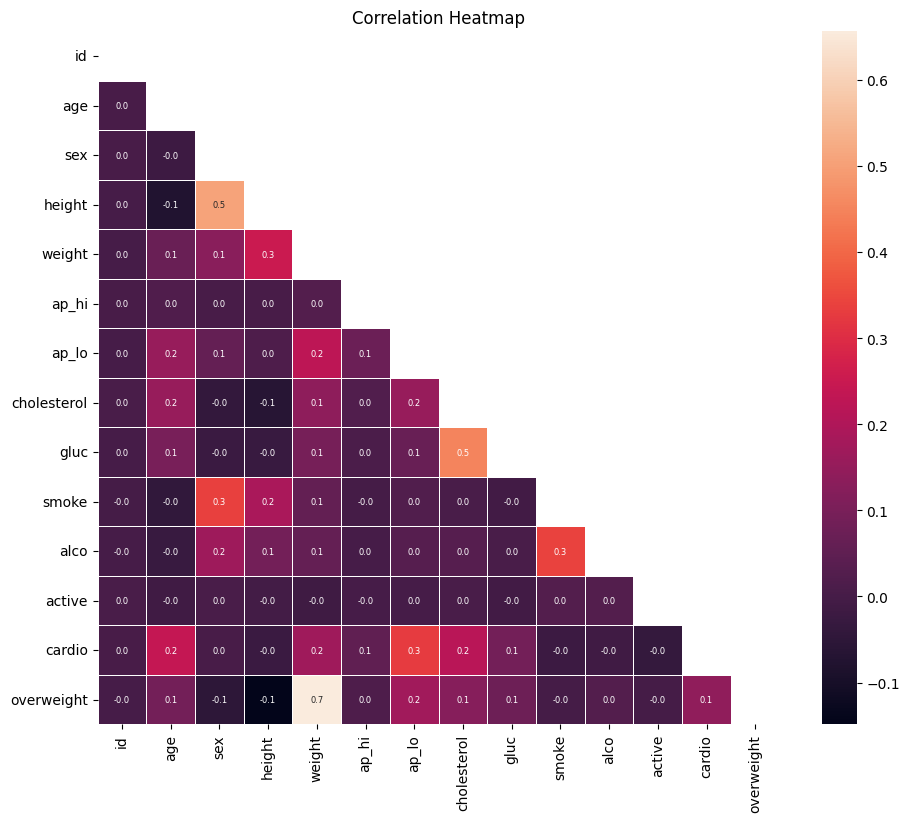

In [441]:
draw_heat_map()

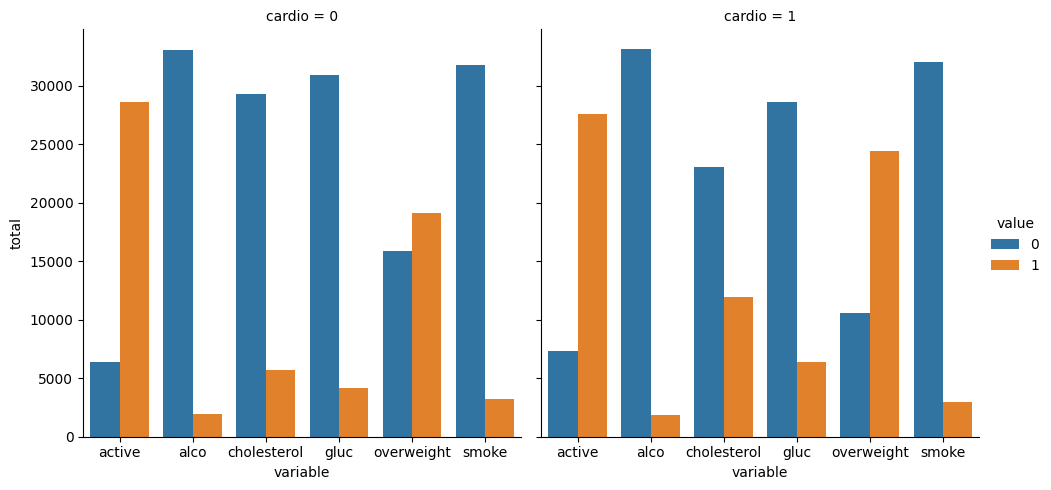

In [442]:
draw_cat_plot()